## Plot chains 

Notebook to plot chains run sampler object using chainconsumer

In [1]:
import numpy as np
import emcee_sampler
from chainconsumer import ChainConsumer

In [2]:
sampler_single_full = emcee_sampler.EmceeSampler(read_chain_file=1)
sampler_single_noise1 = emcee_sampler.EmceeSampler(read_chain_file=2)
sampler_single_noise2 = emcee_sampler.EmceeSampler(read_chain_file=3)
sampler_single_noise3 = emcee_sampler.EmceeSampler(read_chain_file=4)

 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (265000, 6)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (215000, 6)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (235000, 6)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (740000, 6)


In [3]:
chain_single_full,lnprob_single_full=sampler_single_full.get_chain(cube=False)
chain_single_noise1,lnprob_single_noise1=sampler_single_noise1.get_chain(cube=False)
chain_single_noise2,lnprob_single_noise2=sampler_single_noise2.get_chain(cube=False)
chain_single_noise3,lnprob_single_noise3=sampler_single_noise3.get_chain(cube=False)

In [4]:
## Function for prior
sigma=0.15
def prior(x):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-1)**2/(2*sigma**2))
    

In [5]:
## Generate prior data
x=np.linspace(0.5,1.5,500)
y=prior(x)

 /home/chris/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


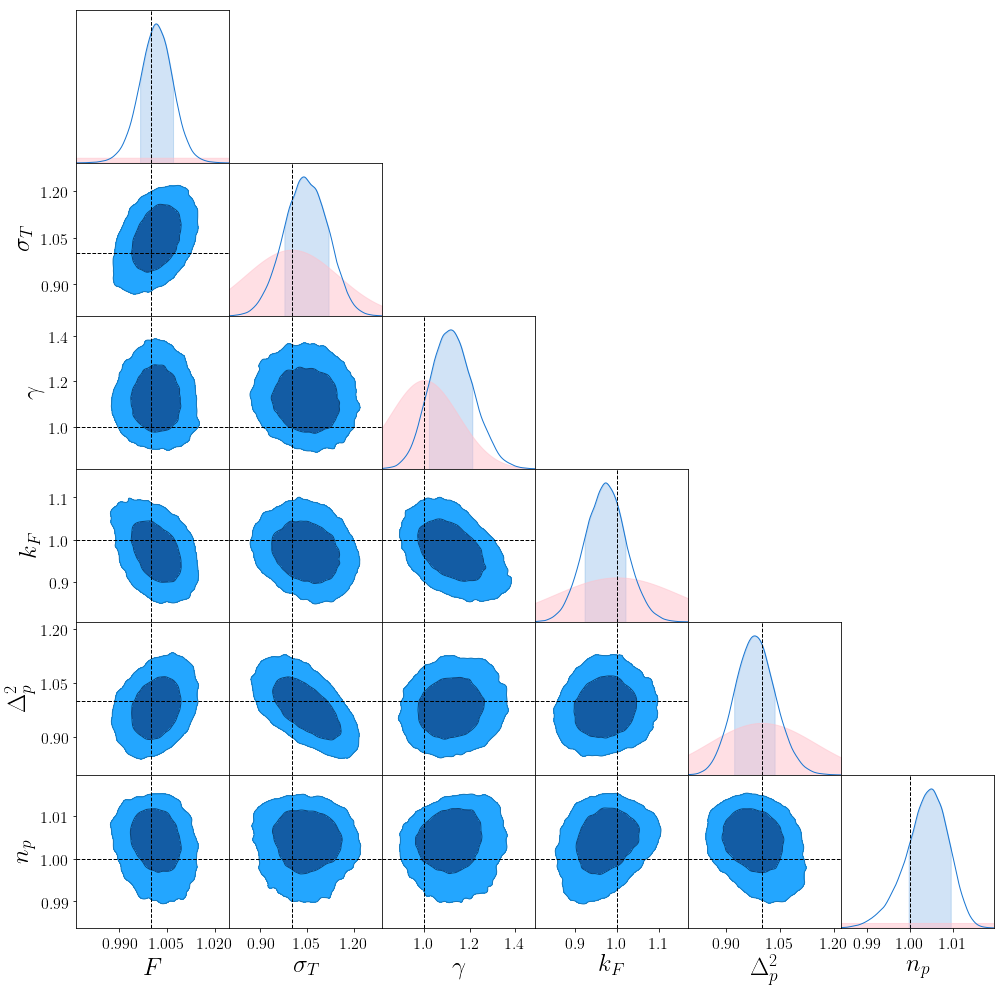

In [6]:
c=ChainConsumer()
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name="1e-3")
#c.add_chain(chain_single_noise1,parameters=sampler_single_noise1.paramstrings,name="1e-5")
#c.add_chain(chain_single_noise2,parameters=sampler_single_noise2.paramstrings,name="1e-7")
#c.add_chain(chain_single_noise3,parameters=sampler_single_noise3.paramstrings,name="1e-10")
c.configure(diagonal_tick_labels=False, tick_font_size=16, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=sampler_single_full.truth)
fig.axes[0].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[7].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[14].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[21].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[28].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[35].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.show()

In [ ]:
## Check effect of different burn ins

In [8]:
sampler_single_lowburn = emcee_sampler.EmceeSampler(read_chain_file=9)
sampler_single_longburn = emcee_sampler.EmceeSampler(read_chain_file=10)

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (300000, 6)


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (150000, 6)


In [9]:
chain_single_lowburn,lnprob_single=sampler_single_lowburn.get_chain(cube=False)
chain_single_longburn,lnprob_single=sampler_single_longburn.get_chain(cube=False)

 /home/chris/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


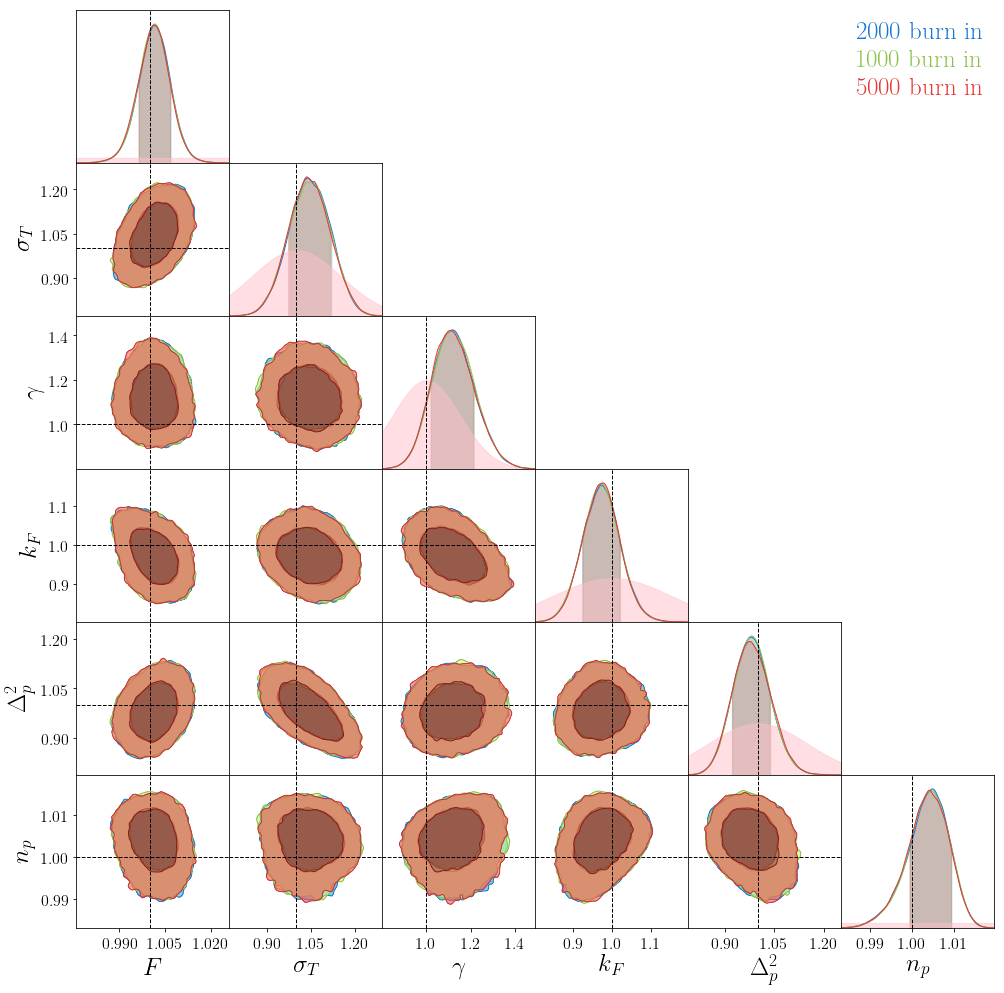

In [10]:
c=ChainConsumer()
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name="2000 burn in")
c.add_chain(chain_single_lowburn,parameters=sampler_single_noise1.paramstrings,name="1000 burn in")
c.add_chain(chain_single_longburn,parameters=sampler_single_noise2.paramstrings,name="5000 burn in")
c.configure(diagonal_tick_labels=False, tick_font_size=16, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=sampler_single_full.truth)
fig.axes[0].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[7].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[14].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[21].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[28].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[35].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.show()

In [13]:
np.shape(chain_single_full)

(265000, 6)